In [100]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
#读入数据
df=pd.read_csv('data_lib1.csv')

In [101]:
#展示头部数据
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean
0,842302,M,17.99,NaN,122.8,1001.0,0.1184,0.27760,0.3001,0.14710
1,842517,M,20.57,NaN,132.9,1326.0,NaN,0.07864,0.0869,0.07017
2,84300903,M,19.69,21.25,NaN,1203.0,NaN,0.15990,NaN,0.12790
3,84348301,M,NaN,20.38,NaN,NaN,NaN,0.28390,NaN,NaN
4,84358402,M,NaN,14.34,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
#展示尾部数据
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean
606,926424,M,NaN,NaN,142.0,1479.0,0.11100,NaN,NaN,0.13890
607,926682,M,20.13,28.25,131.2,1261.0,0.09780,0.10340,0.14400,0.09791
608,926954,M,16.60,28.08,108.3,858.1,0.08455,0.10230,0.09251,NaN
609,927241,M,20.60,29.33,140.1,1265.0,NaN,0.27700,0.35140,0.15200
610,92751,B,7.76,NaN,NaN,181.0,0.05263,0.04362,0.00000,0.00000


In [103]:
#展示数据类型
df.dtypes

id                       int64
diagnosis               object
radius_mean            float64
texture_mean           float64
perimeter_mean         float64
area_mean              float64
smoothness_mean        float64
compactness_mean       float64
concavity_mean         float64
concave points_mean    float64
dtype: object

In [104]:
#展示数据的信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   611 non-null    int64  
 1   diagnosis            611 non-null    object 
 2   radius_mean          595 non-null    float64
 3   texture_mean         585 non-null    float64
 4   perimeter_mean       584 non-null    float64
 5   area_mean            585 non-null    float64
 6   smoothness_mean      583 non-null    float64
 7   compactness_mean     582 non-null    float64
 8   concavity_mean       572 non-null    float64
 9   concave points_mean  583 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 47.9+ KB


In [105]:
#检查重复情况
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
606     True
607     True
608    False
609    False
610    False
Length: 611, dtype: bool

In [106]:
#删除数据集中重复的行
df[df.duplicated()]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean
7,842517,M,20.570,NaN,132.90,1326.0,NaN,0.07864,0.08690,0.070170
8,84300903,M,19.690,21.25,NaN,1203.0,NaN,0.15990,NaN,0.127900
160,864496,B,8.726,15.83,55.84,230.9,0.11500,0.08201,0.04132,0.019240
161,864685,B,11.930,21.53,76.53,438.6,0.09768,0.07849,0.03328,0.020080
162,864726,B,8.950,15.76,58.74,245.2,0.09462,0.12430,0.09263,0.023080
163,864729,M,14.870,16.67,98.64,682.5,0.11620,0.16490,0.16900,0.089230
164,864877,M,15.780,22.91,105.70,782.6,0.11550,0.17520,0.21330,0.094790
165,865128,M,17.950,20.01,114.20,982.0,0.08402,0.06722,0.07293,0.055960
166,865137,B,11.410,10.82,73.34,403.3,0.09373,0.06685,0.03512,0.026230
167,86517,M,18.660,17.12,121.40,1077.0,0.10540,0.11000,0.14570,0.086650


In [107]:
#重复值的处理（删除重复值）
df.drop_duplicates()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean
0,842302,M,17.99,NaN,122.8,1001.0,0.11840,0.27760,0.30010,0.14710
1,842517,M,20.57,NaN,132.9,1326.0,NaN,0.07864,0.08690,0.07017
2,84300903,M,19.69,21.25,NaN,1203.0,NaN,0.15990,NaN,0.12790
3,84348301,M,NaN,20.38,NaN,NaN,NaN,0.28390,NaN,NaN
4,84358402,M,NaN,14.34,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
604,925622,M,15.22,30.62,103.4,716.9,0.10480,0.20870,0.25500,0.09429
605,926125,M,20.92,25.09,143.0,1347.0,0.10990,0.22360,0.31740,0.14740
608,926954,M,16.60,28.08,108.3,858.1,0.08455,0.10230,0.09251,NaN
609,927241,M,20.60,29.33,140.1,1265.0,NaN,0.27700,0.35140,0.15200


In [108]:
#查看每列缺失值个数
missing_values=df.isnull().sum()

In [109]:
#计算每个特征的缺失值比列
missing_percentage=(df.isnull().sum()/len(df))*100

In [110]:
missinginfo=pd.DataFrame(({'缺失值数量': missing_values, '缺失值比例': missing_percentage}))
missinginfo

,缺失值数量,缺失值比例
id,0,0.000000
diagnosis,0,0.000000
radius_mean,16,2.618658
texture_mean,26,4.255319
perimeter_mean,27,4.418985
area_mean,26,4.255319
smoothness_mean,28,4.582651
compactness_mean,29,4.746318
concavity_mean,39,6.382979
concave points_mean,28,4.582651


In [111]:
#删除缺失值
df.dropna()
df.dropna(axis=1)

,id,diagnosis
0,842302,M
1,842517,M
2,84300903,M
3,84348301,M
4,84358402,M
...,...,...
606,926424,M
607,926682,M
608,926954,M
609,927241,M


In [112]:
# 处理缺失值，将“ ? ”替换为标准缺失值，并丢弃带有缺失值的数据。

# 将 ? 替换为标准缺失值符号表示
data = df.replace(to_replace='?', value=np.nan)
# 丢弃带有缺失值的数据（只要有一个维度有缺失）
data = df.dropna(how='any')

# 查看数据形状。

# 输出 data 的数据量和维度。
data.shape


(536, 10)

In [113]:
#将字符串和布尔字符转换成整数
df['diagnosis'] = df['diagnosis'].astype('category').cat.codes
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean
0,842302,1,17.99,NaN,122.8,1001.0,0.11840,0.27760,0.30010,0.14710
1,842517,1,20.57,NaN,132.9,1326.0,NaN,0.07864,0.08690,0.07017
2,84300903,1,19.69,21.25,NaN,1203.0,NaN,0.15990,NaN,0.12790
3,84348301,1,NaN,20.38,NaN,NaN,NaN,0.28390,NaN,NaN
4,84358402,1,NaN,14.34,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
606,926424,1,NaN,NaN,142.0,1479.0,0.11100,NaN,NaN,0.13890
607,926682,1,20.13,28.25,131.2,1261.0,0.09780,0.10340,0.14400,0.09791
608,926954,1,16.60,28.08,108.3,858.1,0.08455,0.10230,0.09251,NaN
609,927241,1,20.60,29.33,140.1,1265.0,NaN,0.27700,0.35140,0.15200


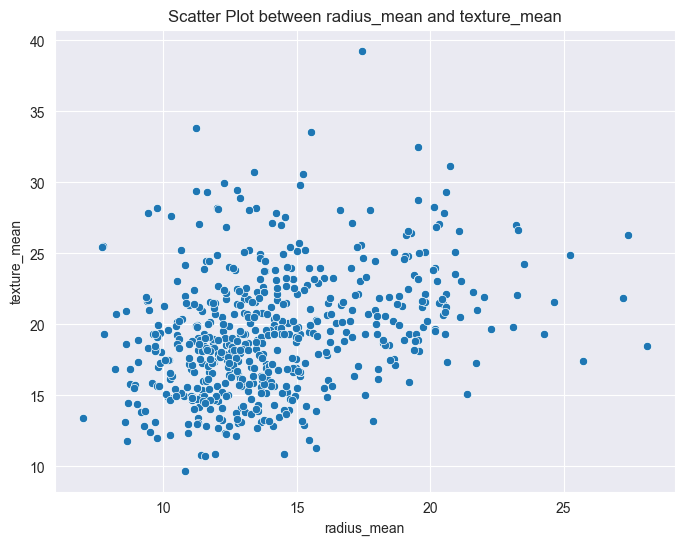

In [114]:
df_filled = df.fillna(df.mean())

feature1 = 'radius_mean'
feature2 = 'texture_mean'
    
plt.figure(figsize=(8, 6))
sns.scatterplot(x=feature1, y=feature2, data=df_filled)
plt.title(f'Scatter Plot between {feature1} and {feature2}')
plt.show()

In [115]:
df_filled.to_csv('preprocessed_data.csv', index=False)

In [116]:
# 从CSV文件加载数据
df = pd.read_csv('preprocessed_data.csv')

# 划分训练集和测试集
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

train_df
test_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean
81,8610908,0,12.86,18.00,83.19,506.3,0.09934,0.09546,0.03889,0.023150
218,8810158,0,13.11,22.54,87.02,529.4,0.10020,0.14830,0.08705,0.051020
55,857392,1,18.22,18.70,120.30,1033.0,0.11480,0.14850,0.17720,0.106000
599,925291,0,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.041050
264,87930,0,12.47,18.60,81.09,481.9,0.09965,0.10580,0.08005,0.038210
...,...,...,...,...,...,...,...,...,...,...
370,89864002,0,11.71,15.45,75.03,420.3,0.11500,0.07281,0.04006,0.049434
259,877500,1,14.45,20.22,94.49,642.7,0.09872,0.12060,0.11800,0.059800
301,8911164,0,11.89,17.36,76.20,435.6,0.12250,0.07210,0.05929,0.074040
228,8811842,1,19.80,21.56,129.70,1230.0,0.09383,0.13060,0.12720,0.086910


In [117]:
# 从CSV文件加载预处理后的数据
df = pd.read_csv('preprocessed_data.csv')

# 特征和标签的分离
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 初始化模型
decision_tree_model = DecisionTreeClassifier(random_state=42)

# 训练模型
decision_tree_model.fit(X_train, y_train)

# 预测测试集
y_pred_dt = decision_tree_model.predict(X_test)

# 准确度评估
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# 交叉验证评估
cv_scores_dt = cross_val_score(decision_tree_model, X, y, cv=5)

# 输出模型性能
print("决策树模型准确度:", accuracy_dt)
print("决策树模型交叉验证得分:", cv_scores_dt.mean())

# 打印分类报告
print("决策树模型分类报告:\n", classification_report(y_test, y_pred_dt, zero_division=1))


决策树模型准确度: 0.8967391304347826
决策树模型交叉验证得分: 0.8691989870718381
决策树模型分类报告:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91       110
           1       0.87      0.88      0.87        74

    accuracy                           0.90       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.90      0.90      0.90       184


In [118]:
# 从CSV文件加载预处理后的数据
df = pd.read_csv('preprocessed_data.csv')
# 特征和标签的分离
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# 初始化模型
svm_model = SVC(random_state=42)
# 训练模型
svm_model.fit(X_train, y_train)
# 预测测试集
y_pred_svm = svm_model.predict(X_test)
# 准确度评估
accuracy_svm = accuracy_score(y_test, y_pred_svm)
# 交叉验证评估
cv_scores_svm = cross_val_score(svm_model, X, y, cv=5)
# 输出模型性能
print("SVM模型准确度:", accuracy_svm)
print("SVM模型交叉验证得分:", cv_scores_svm.mean())
# 打印分类报告
print("SVM模型分类报告:", classification_report(y_test, y_pred_svm, zero_division=1))

SVM模型准确度: 0.5978260869565217
SVM模型交叉验证得分: 0.6121284819405572
SVM模型分类报告:               precision    recall  f1-score   support

           0       0.60      1.00      0.75       110
           1       1.00      0.00      0.00        74

    accuracy                           0.60       184
   macro avg       0.80      0.50      0.37       184
weighted avg       0.76      0.60      0.45       184


In [119]:
# 从CSV文件加载预处理后的数据
df = pd.read_csv('preprocessed_data.csv')
# 特征和标签的分离
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# 初始化模型
random_forest_model = RandomForestClassifier(random_state=42)
# 训练模型
random_forest_model.fit(X_train, y_train)
# 预测测试集
y_pred_rf = random_forest_model.predict(X_test)
# 准确度评估
accuracy_rf = accuracy_score(y_test, y_pred_rf)
# 交叉验证评估
cv_scores_rf = cross_val_score(random_forest_model, X, y, cv=5)
# 输出模型性能
print("随机森林模型准确度:", accuracy_rf)
print("随机森林模型交叉验证得分:", cv_scores_rf.mean())
# 打印分类报告
print("随机森林模型分类报告:\n", classification_report(y_test, y_pred_rf, zero_division=1))


随机森林模型准确度: 0.9456521739130435
随机森林模型交叉验证得分: 0.9313341330134612
随机森林模型分类报告:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96       110
           1       0.97      0.89      0.93        74

    accuracy                           0.95       184
   macro avg       0.95      0.94      0.94       184
weighted avg       0.95      0.95      0.95       184
